# Cervical Cancer Risk Prediction


# Introduction

Cervical cancer is a malignant tumour starting in the cells of a woman’s cervix, and possibly spreading or metastasizing to other parts of her body. Although the number of cases of cervical cancer have been declining in recent years due to more advanced screening and early detection with the Pap test, 300,000 women worldwide die each year due to cervical cancer. My investigation of the Risk Factors of Cervical Cancer Dataset focuses on predicting whether a woman will result in having a biopsy due to cervical cancer.

The dataset was obtained from UCI Repository and it can be downloaded from the UCI Machine Learning repository, described by Fernandes, Cardoso, and Fernandes (2017)16.

It contains 858 instances with 36 features. The features include demographic data (such as age), lifestyle, and medical history.

Age in years

Number of sexual partners

First sexual intercourse (age in years)

Number of pregnancies

Smoking yes or no

Smoking (in years)

Hormonal contraceptives yes or no

Hormonal contraceptives (in years)

Intrauterine device yes or no (IUD)

Number of years with an intrauterine device (IUD)

Has patient ever had a sexually transmitted disease (STD) yes or no

Number of STD diagnoses

Time since first STD diagnosis

Time since last STD diagnosis

The biopsy results “Healthy” 0 or “Cancer” 1. This column is a target.

## Import libraries

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Models
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [292]:
# read the csv file 
df = pd.read_csv(r"I:\cervical_cancer.csv")


In [293]:
# print 10 rows
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in this data frame')
df.head(10)

There are 858 rows and 36 columns in this data frame


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


# Data Prep

Checking data types and null values in the dataset

In [294]:
# Get the data type of each column and whether null values are present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [295]:
# Get the statistics of the data frame
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Some observations based on above EDA:
    1- Minmum age is 13 and maximum age is 84.
    2- The value of these 4 column Hineselmann + Schiller + Citology + Biopsy are considered as a chance of high risk.
    3- It shows there is no missing values in the dataset but there is ? in some columns. We need to replace them with NaN values

In [296]:
# Categorical and numerical columns 
numerical_cols = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
categorical_cols = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']

In [297]:
# There are ? values in some columns, let's replace ? values with NaN
df = df.replace('?', 'NaN')

In [298]:
for col in df.columns:
       df[col] = pd.to_numeric(df[col],errors = 'coerce')

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [300]:
# drop those columns because they have lot of missing data
missing_cols = ['STDs: Time since last diagnosis', 'STDs: Time since first diagnosis']
df = df.drop(missing_cols, axis = 1)

final_col_categorical = list(set(categorical_cols) - set(missing_cols))

In [301]:
### Filling the missing values of numeric data columns with mean of the column data.
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

In [302]:
### Filling the missing values of categorical data columns with 1.
for col in final_col_categorical:
    df[col] = df[col].fillna(1.0)

In [303]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

# Data Visualization

C:\Users\Sarira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sarira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sarira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sarira\anaconda3\li

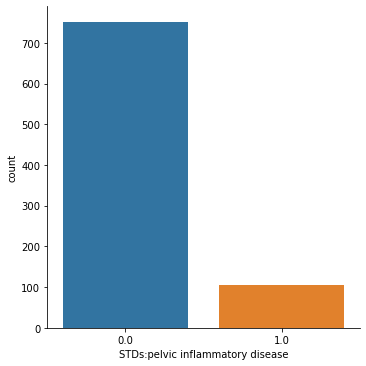

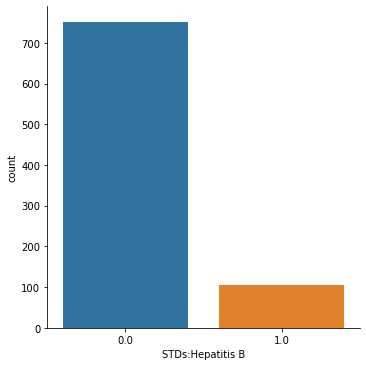

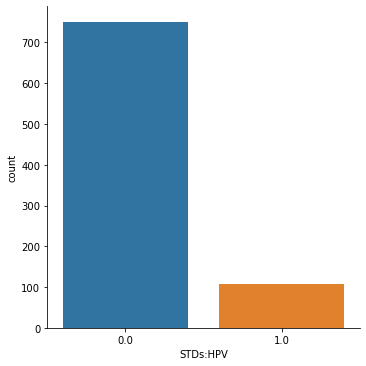

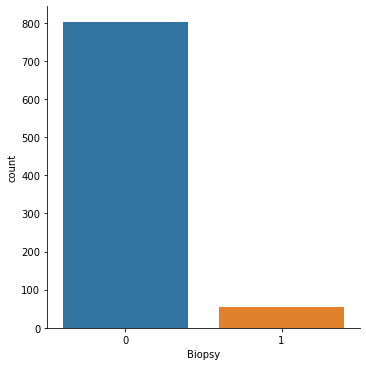

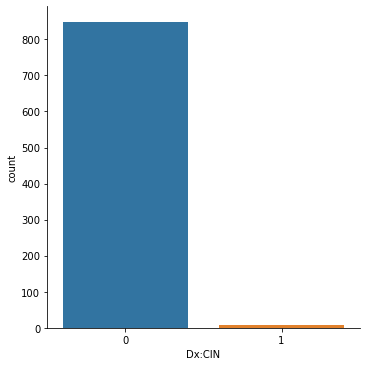

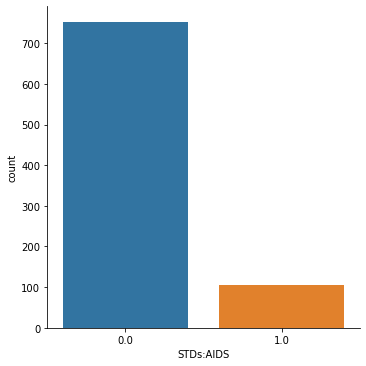

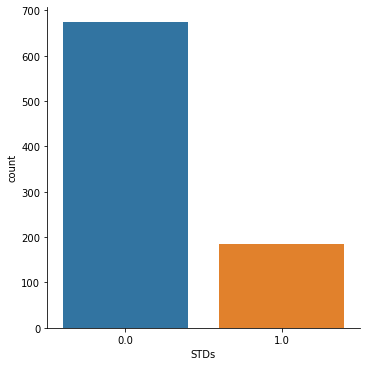

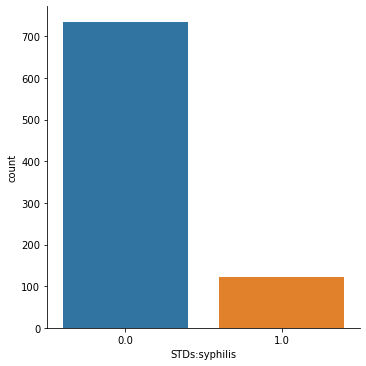

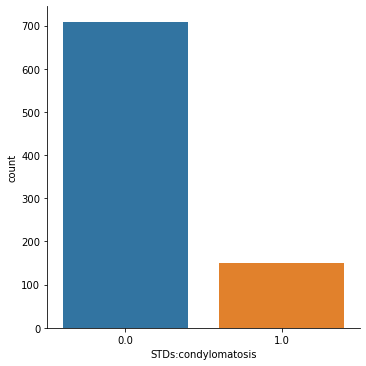

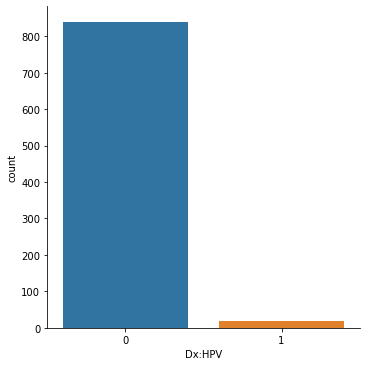

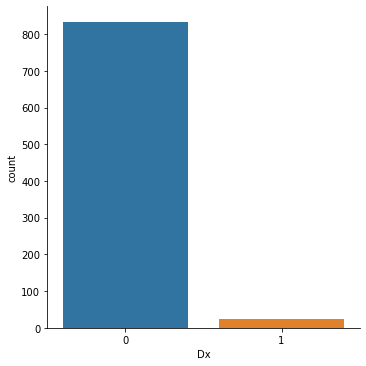

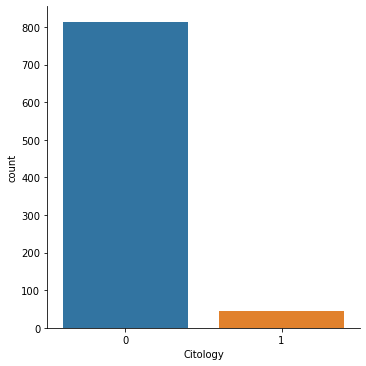

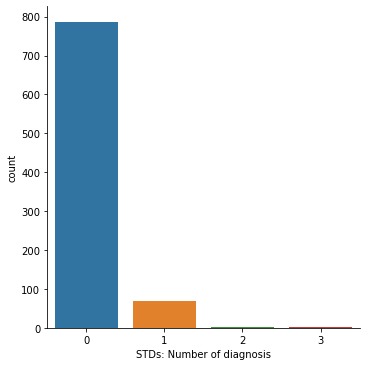

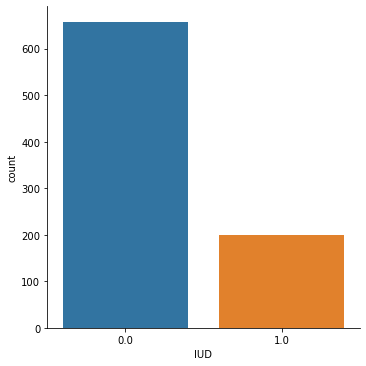

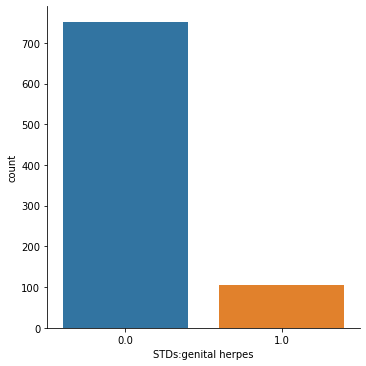

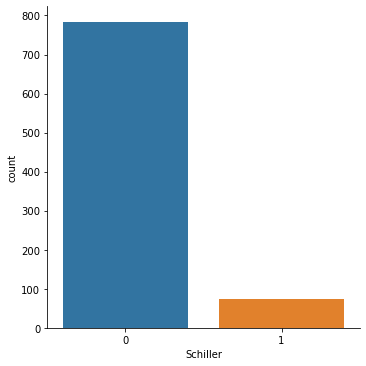

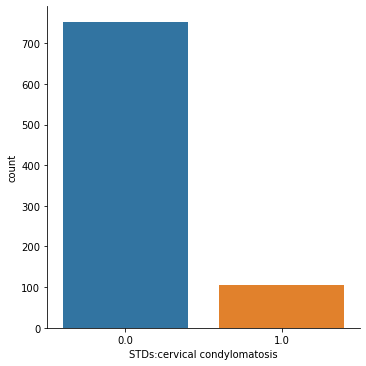

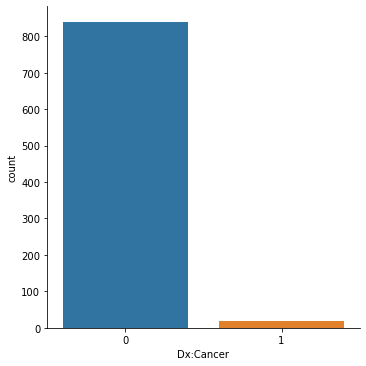

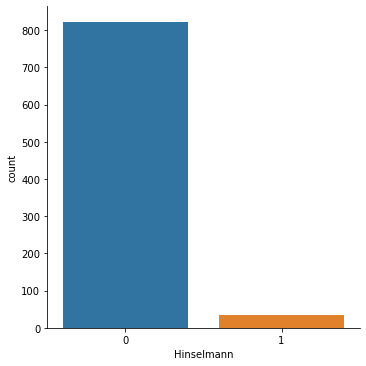

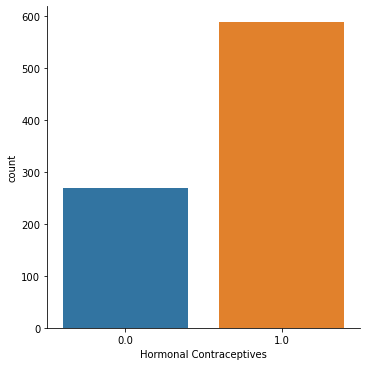

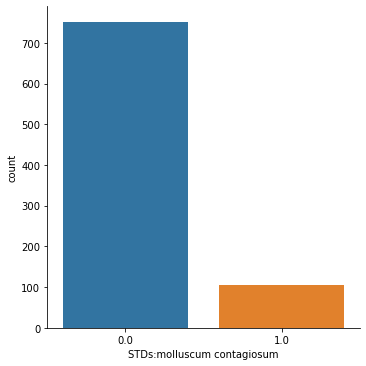

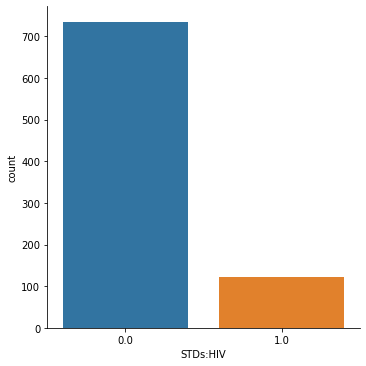

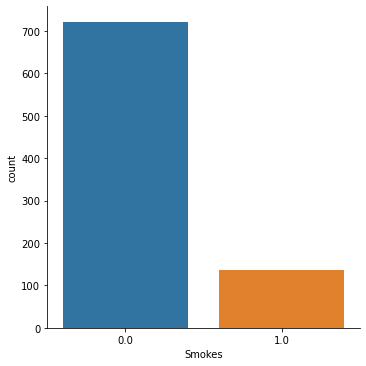

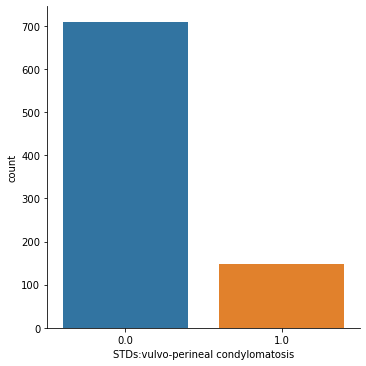

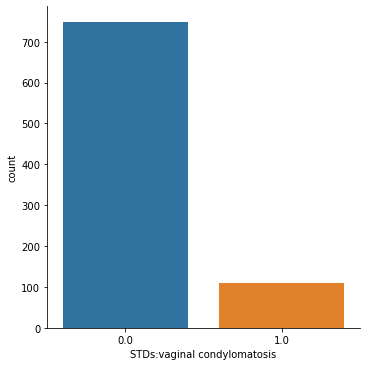

In [305]:
for col in final_col_categorical:
    sns.catplot(col,data=df,kind='count')

From the above graphs it can be seen that Harmonal Contraceptive has the highest number of ones which indicates that this might be the important key factor in detecting the cervical cancer.

<AxesSubplot:>

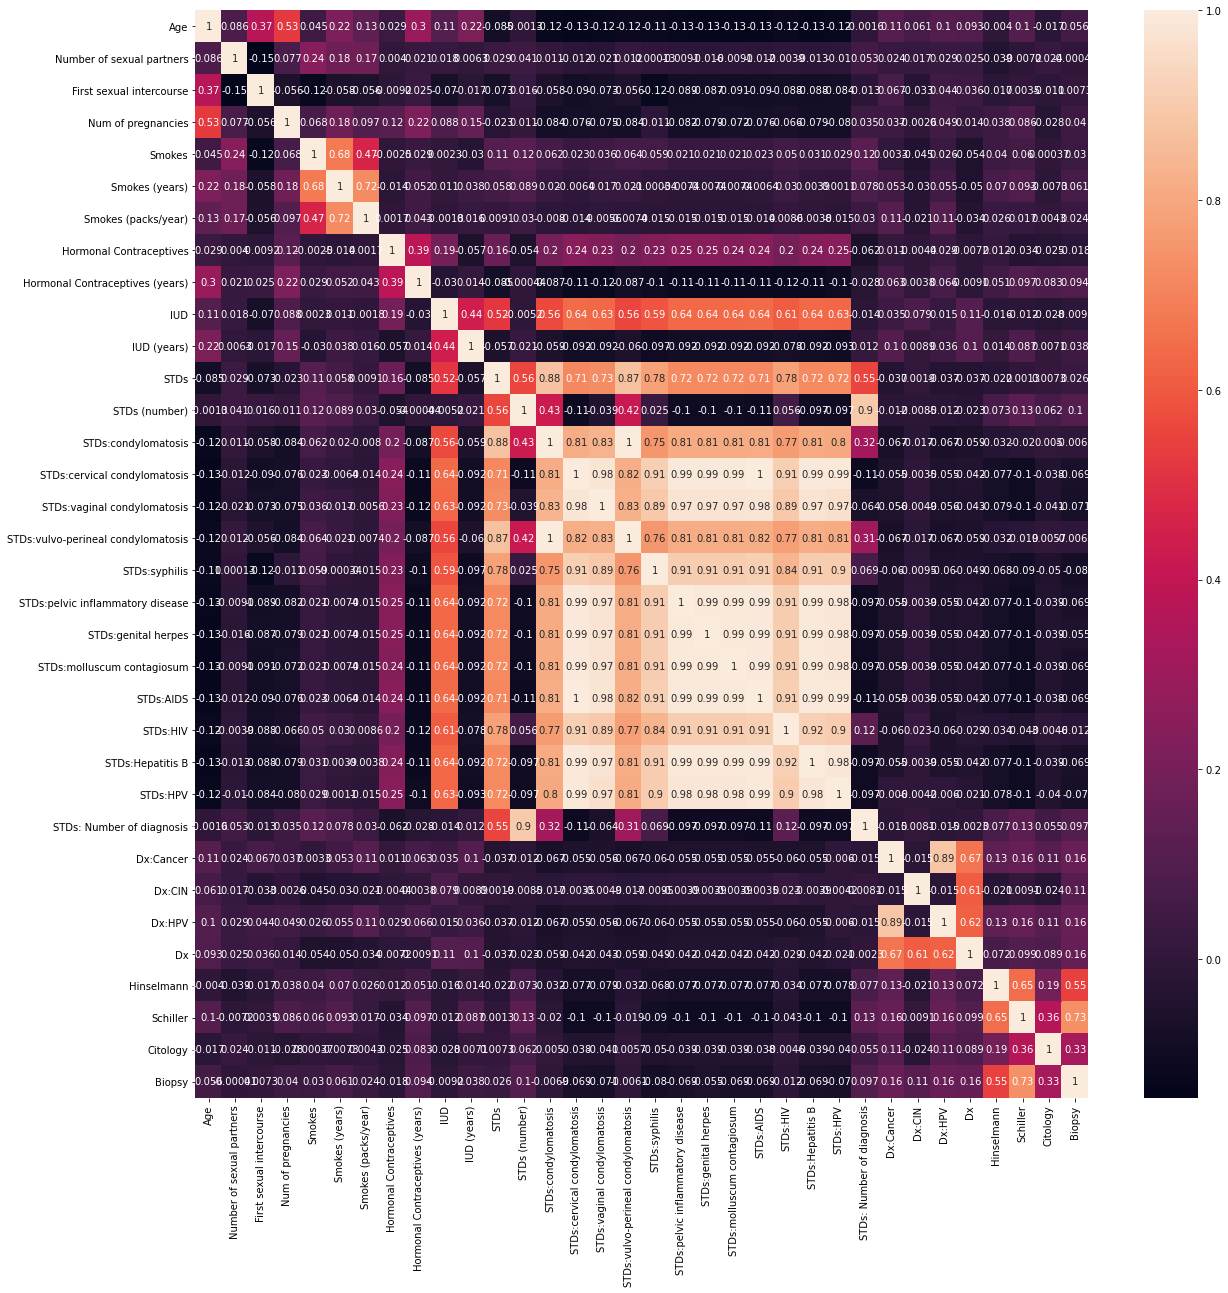

In [306]:
# Get the correlation matrix
plt.figure(figsize = (20,20))
correlationM = df.corr()
sns.heatmap(correlationM, annot = True)

According to the heatmap, Biopsy has strong correlation with Citology, Schiller, and Hinselmann features. Therefore, we need to drop them from the features.

In [307]:
df.drop(['Citology', 'Schiller', 'Hinselmann'], axis = 1)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0.0,0.0,0.0,0,1,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


Text(0, 0.5, 'Count')

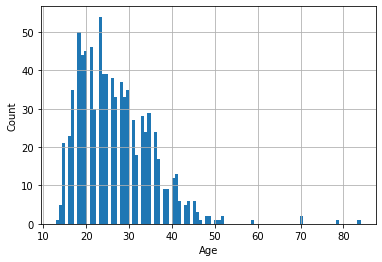

In [308]:
df['Age'].hist(bins=100)
plt.xlabel('Age')
plt.ylabel('Count')

The age is between 13 to 84 and mean age is 26.

<AxesSubplot:xlabel='STDs (number)', ylabel='count'>

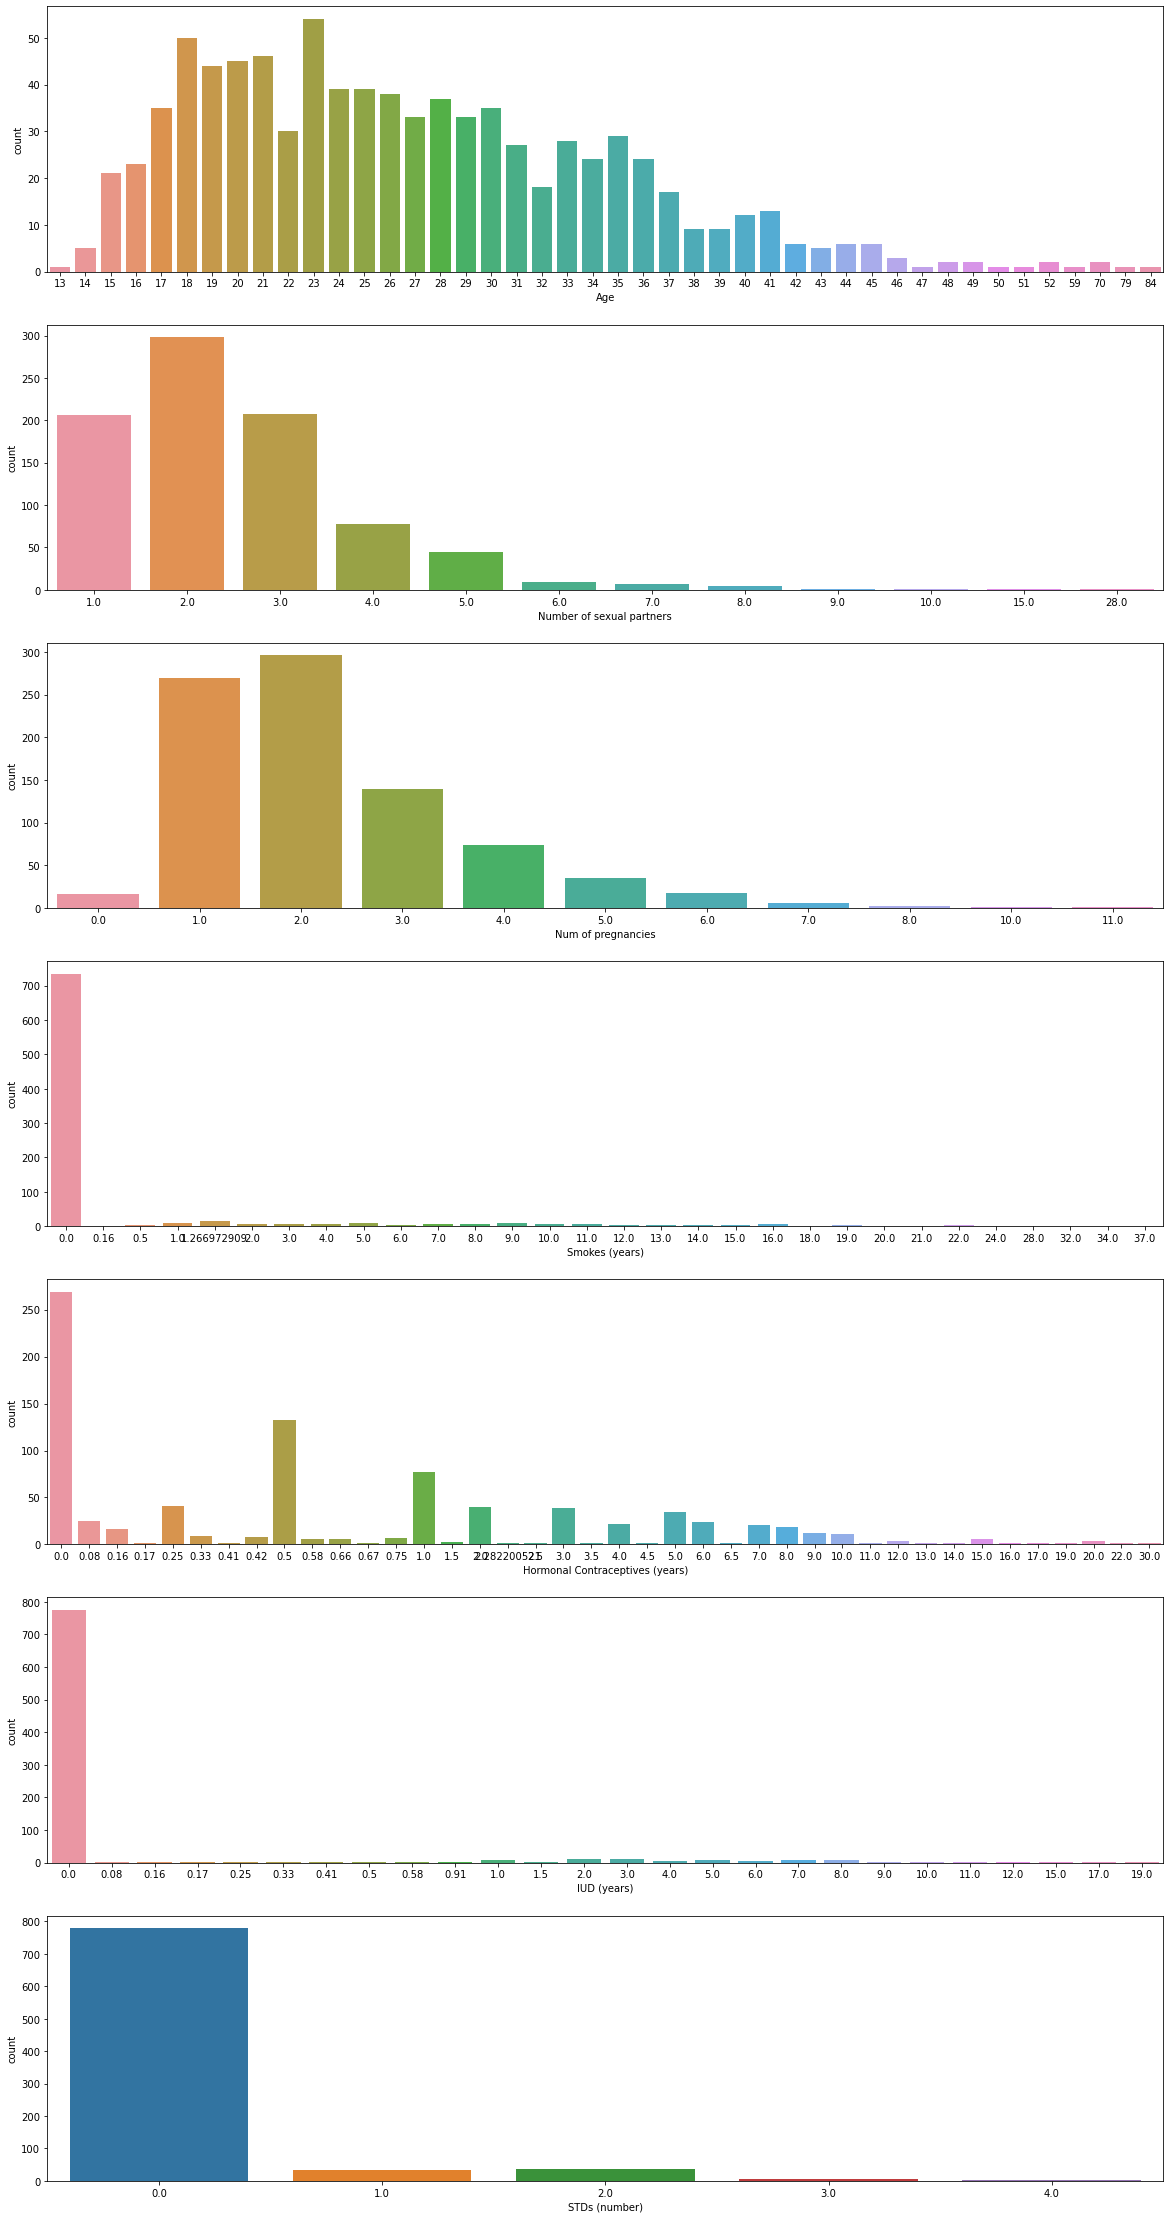

In [309]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7, 1, figsize = (20,40))
sns.countplot(x='Age', data=df, ax=ax1)
sns.countplot(x='Number of sexual partners', data=df, ax=ax2)
sns.countplot(x='Num of pregnancies', data=df, ax=ax3)
sns.countplot(x='Smokes (years)', data=df, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=df, ax=ax5)
sns.countplot(x='IUD (years)', data=df, ax=ax6)
sns.countplot(x='STDs (number)', data=df, ax=ax7)

# Prepare Data for model

In [310]:
X=df.drop(["Biopsy"], axis=1)
y=df["Biopsy"]

print(X.shape)
print(y.shape)

(858, 33)
(858,)


In [311]:
# Splitting dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [312]:
# scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Modeling

Model:  KNC
0.9476744186046512
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       164
           1       0.00      0.00      0.00         8

    accuracy                           0.95       172
   macro avg       0.48      0.50      0.49       172
weighted avg       0.91      0.95      0.93       172

Model:  Linear SVC
0.9534883720930233
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       164
           1       0.00      0.00      0.00         8

    accuracy                           0.95       172
   macro avg       0.48      0.50      0.49       172
weighted avg       0.91      0.95      0.93       172



C:\Users\Sarira\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sarira\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sarira\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model:  SVC
0.9593023255813954
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       164
           1       1.00      0.12      0.22         8

    accuracy                           0.96       172
   macro avg       0.98      0.56      0.60       172
weighted avg       0.96      0.96      0.94       172

Model:  RFC
0.9534883720930233
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       164
           1       0.00      0.00      0.00         8

    accuracy                           0.95       172
   macro avg       0.48      0.50      0.49       172
weighted avg       0.91      0.95      0.93       172



C:\Users\Sarira\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sarira\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sarira\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model:  GBC
0.9651162790697675
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       164
           1       0.62      0.62      0.62         8

    accuracy                           0.97       172
   macro avg       0.80      0.80      0.80       172
weighted avg       0.97      0.97      0.97       172



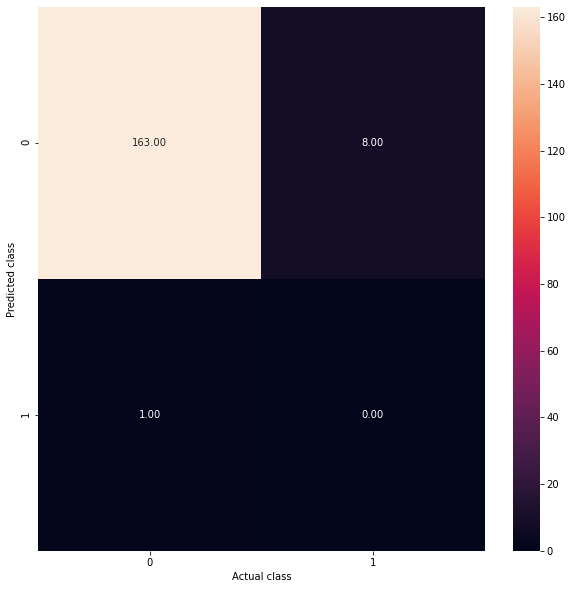

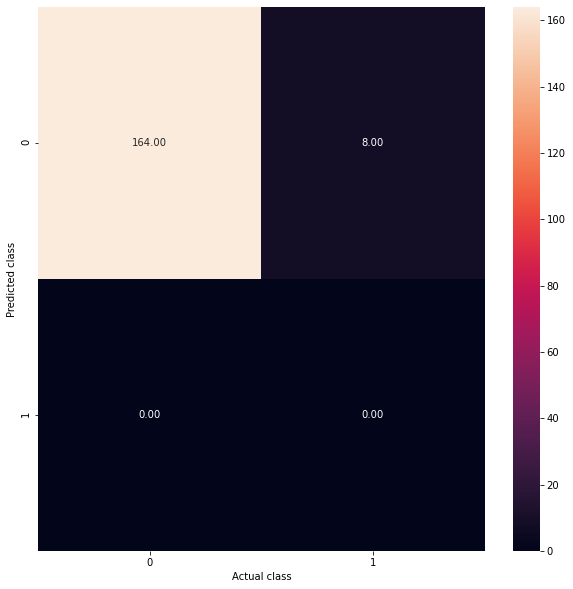

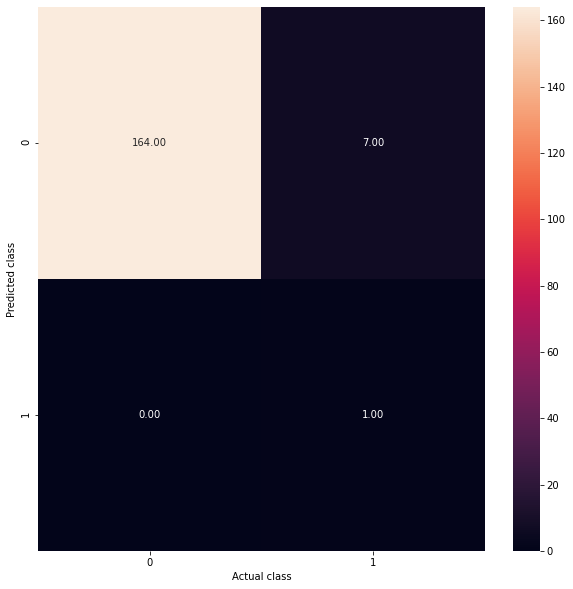

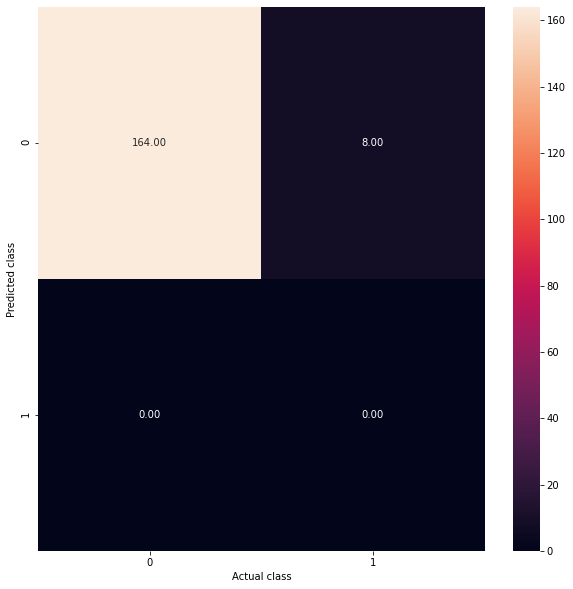

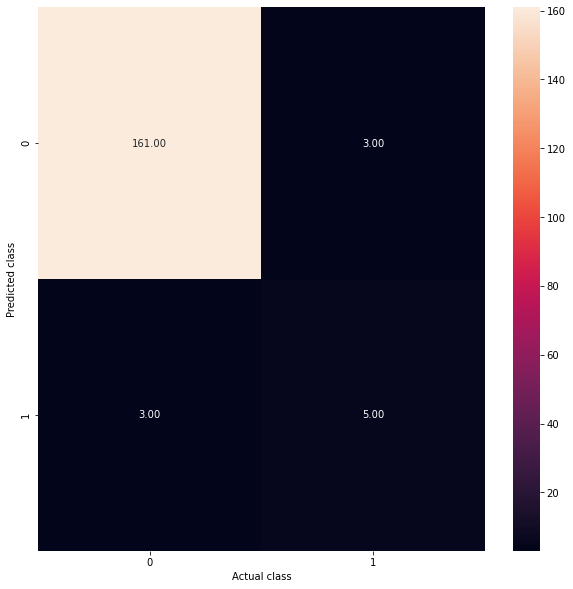

In [313]:
# Building different models

models = []

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),
    GradientBoostingClassifier(random_state=42)
    ]

names = ["KNC", "Linear SVC", "SVC", "RFC", "GBC"]


clfs = list(zip(classifiers, names))

for clf, n in clfs:
    print("Model: ", n)
    clf.fit(X_train, y_train)
    preds = np.rint(clf.predict(X_test))
    print(accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))
    
    
    plt.figure(figsize=(10, 10))
    cm = confusion_matrix(preds, y_test) 
    sns.heatmap(cm, annot = True,fmt = '.2f')
    plt.ylabel('Predicted class')
    plt.xlabel('Actual class')

# Evalution

The Gradient Boost Classifier has an impressive accuracy of %96. It has the highest accuracy, recall , and F1 score between all other classifiers. Since this model uses tree, changing max_depth parameter has increased the accuracy.